In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Naive_bsyes_spam_email_classifier/spam_email.csv")

In [ ]:
print(df.head(5))

  Category                                                Msg
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
df.groupby('Category').describe()

Msg                                                               
         count unique                                                top freq
Category                                                                     
ham       4827   4518                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [ ]:
df.dtypes

,0
Category,object
Msg,object


In [ ]:
df['label'] = df.Category.map({'ham': 0, 'spam': 1})
df['msg_len']= df.Msg.apply(len)
df.head(50)

,Category,Msg,label,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147
6,ham,Even my brother is not like to speak with me. ...,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,spam,WINNER!! As a valued network customer you have...,1,157
9,spam,Had your mobile 11 months or more? U R entitle...,1,154


In [ ]:
c = df.groupby('Category')
for Category, Msg in c:
  print(Category)
  print(Msg)

ham
     Category                                                Msg  label  \
0         ham  Go until jurong point, crazy.. Available only ...      0   
1         ham                      Ok lar... Joking wif u oni...      0   
3         ham  U dun say so early hor... U c already then say...      0   
4         ham  Nah I don't think he goes to usf, he lives aro...      0   
6         ham  Even my brother is not like to speak with me. ...      0   
...       ...                                                ...    ...   
5567      ham                                       Huh y lei...      0   
5570      ham               Will ü b going to esplanade fr home?      0   
5571      ham  Pity, * was in mood for that. So...any other s...      0   
5572      ham  The guy did some bitching but I acted like i'd...      0   
5573      ham                         Rofl. Its true to its name      0   

      msg_len  
0         111  
1          29  
3          49  
4          61  
6          77  

<ipython-input-11-7c9171ac143c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='msg_len', y='Category', inner='box', palette='Dark2')


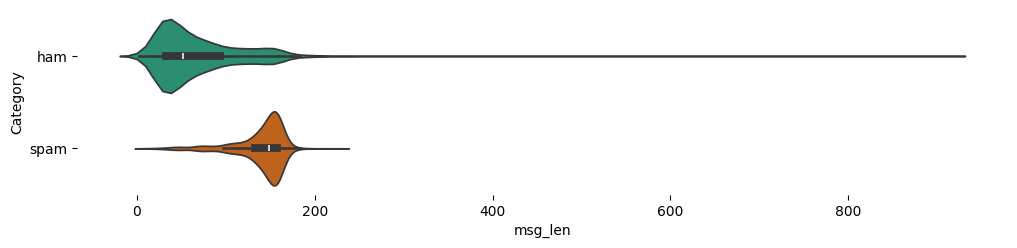

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='msg_len', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Text(0.5, 0, 'Message Length')

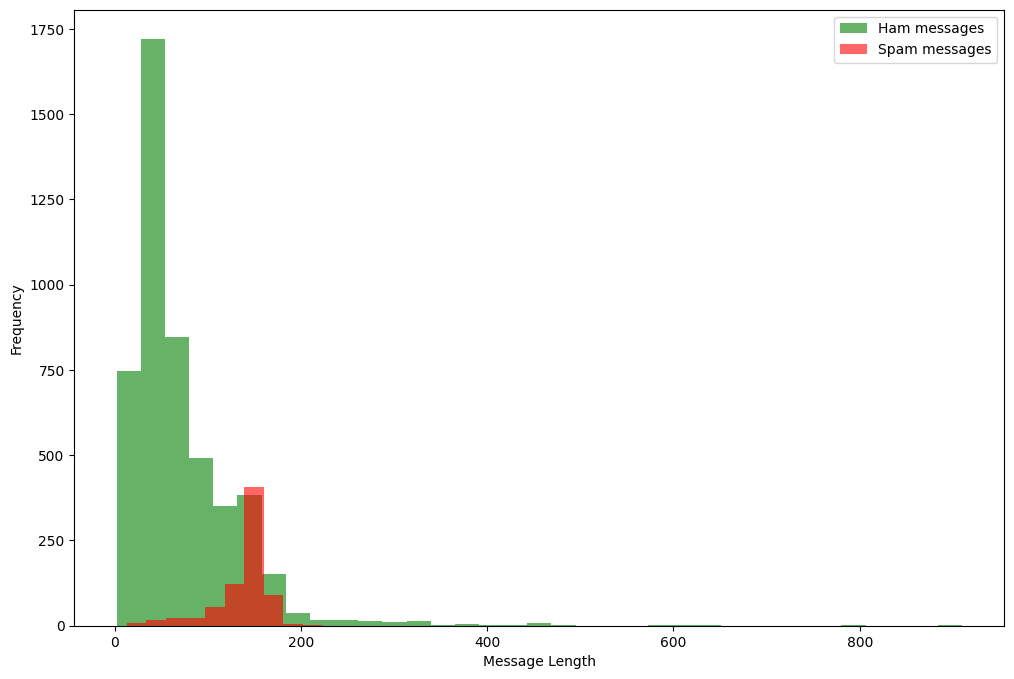

In [ ]:
plt.figure(figsize=(12, 8))

df[df.Category=='ham'].msg_len.plot(bins=35, kind='hist', color='green', label='Ham messages', alpha=0.6)

df[df.Category=='spam'].msg_len.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")


## **Training and Testing the Dataset**
## **split the overall dataset for train(80%) and test dataset(20% or 0.2)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.Msg, df.label, test_size =0.2)

# **Text Data Processing in NLP- Using Bag Of Words(BOW) approach**
Using Bag of words Model(BOW) we Convert Text messges of Msg column into numbers

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

word_freq_count = CountVectorizer()
X_train_count = word_freq_count.fit_transform(X_train.values)

print(word_freq_count.get_feature_names_out())

['00' '000' '000pes' ... 'èn' 'ú1' '〨ud']


In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Feeding the processed data into the machine learning model -->in this case MultinomialNaiive Bayes for discrete data**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,Y_train)

MultinomialNB()

## Testing it now from the trained model above by giving your own texts

In [ ]:
mail_text = ['Congratulations you got a massive  offer','Get the children ready we will go to dinner']

mail_transformed = word_freq_count.transform(mail_text)
predictions=model.predict(mail_transformed)
for i, mail in enumerate(mail_text):
    print(f"Mail: {mail}")
    print(f"Prediction: {predictions[i]}")

Mail: Congratulations you got a massive  offer
Prediction: 1
Mail: Get the children ready we will go to dinner
Prediction: 0


## model's accuracy from the processed data and the bayesian classifer model

In [ ]:
X_test_count = word_freq_count.transform(X_test)
model.score(X_test_count, Y_test)

0.9865470852017937